# 2. 신경망의 수학적 구성 요소

텐서, 텐서 연산, 미분, 경사 하강법(gradient descent)

## 2.1 신경망과의 첫 만남

케라스 파이썬 라이브러리 사용해 손글씨 숫자 분류 학습 구체적 신경망 예제</br>
MNIST 데이터셋 사용 흑백 손글씨 숫자 이미지(28*28 px)를 10개의 범주(0-9)로 분류</br>
60,000 train iamges, 10,000 test images</br>
numpy 배열 형태

- category > class</br>
- data point > sample</br>
- 특정 sample의 class > lable

In [1]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()    # (training set), (test set)

In [2]:
print(train_images.shape)
print(len(train_labels))    # length


(60000, 28, 28)
60000


In [3]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [4]:
print(test_images.shape)
print(len(test_labels))

(10000, 28, 28)
10000


In [5]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [6]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation = "softmax"),
])

layer > data를 위한 filter, 주어진 문제에 더 의미있는 representation 을 입력 data로 부터 추출</br>
조밀하게 연결된, fully connected 신경망 층 DDense 층 2개가 연속</br>
2nd layer > 10개의 확률 점수가 들어 있는 뱅열을 반환하는 sofemax 분류 층

- <b>optimizer</b>: 성능 향상을 위해 입력된 데이터 기반 모델 업데이트 메커니즘

- <b>loss function</b>: training data에서 모델 성능 측정법, 모델이 옳은 방향 학습 되도록 함

- <b>metrics</b>: 훈련/테스트 과정 지표, 여기서는 accuracy만 고려

In [7]:
model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
    )

[0, 255] 사이의 값 uint8 (60000, 28, 28) 배열에서</br>
0과 1 사이의 값 float32 (60000, 28 * 28) 배열로 변환

In [8]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [9]:
model.fit(
    train_images, train_labels,
    epochs=5,
    batch_size=128
)

Epoch 1/5
469/469 [==============================] - 3s 4ms/step - loss: 0.2570 - accuracy: 0.9254
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1042 - accuracy: 0.9687
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0690 - accuracy: 0.9797
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0503 - accuracy: 0.9852
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0375 - accuracy: 0.9886


In [20]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 [==============================] - 0s 24ms/step


array([3.3071874e-08, 3.7015255e-10, 3.3595982e-06, 1.5916726e-04,
       3.9559280e-12, 4.3712930e-07, 2.0412972e-14, 9.9981695e-01,
       1.9261904e-06, 1.8079885e-05], dtype=float32)

In [21]:
predictions[0].argmax()

7

In [22]:
predictions[0][7]

0.99981695

In [23]:
test_labels[0]

7

In [24]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"테스트 정확도: {test_acc}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0690 - accuracy: 0.9803
테스트 정확도: 0.9803000092506409


## 2.2 신경망을 위한 데이터 표현

tensor, 다차원 넘파이 배열에 데이터 저장, 데이터를 위한 container

### 2.2.1 스칼라(랭크-0 텐서)

- scalar: 하나의 숫자만 담고 있는 tensor</br>
&nbsp;= scalar tensor, rank-0 tensor, 0D tensor

numpy에서 float32, float64

In [25]:
import numpy as np
x = np.array(12)
x

array(12)

In [30]:
x.ndim  # 축 개수(axis, rank) 0

0

### 2.2.2 벡터(랭크-1 텐서)

- vector: 숫자의 배열
&nbsp;= rank-1 tensor, 1D tensor

In [35]:
x = np.array([12, 3, 6, 14, 7]) # 5D vector(o), 5D tensor(x)
x

array([12,  3,  6, 14,  7])

In [32]:
x.ndim

1

### 2.2.3 행렬(랭크-2 텐서)

- matrix: 벡터의 배열
&nbsp;= rank-2 tensor, 2D tensor

2개의 축 row, column

In [43]:
x = np.array([
    [5, 78, 2, 34, 0],
    [6, 79, 3, 35, 1],
    [7, 80, 4, 36, 2]
    ])
x.ndim

2

### 2.2.4 랭크-3 텐서와 더 높은 랭크의 텐서

In [44]:
x = np.array([[
    [5, 78, 2, 34, 0],
    [6, 79, 3, 35, 1],
    [7, 80, 4, 36, 2]
    ],
    [
    [5, 78, 2, 34, 0],
    [6, 79, 3, 35, 1],
    [7, 80, 4, 36, 2]
    ],
    [
    [5, 78, 2, 34, 0],
    [6, 79, 3, 35, 1],
    [7, 80, 4, 36, 2]
    ]])

In [45]:
x.ndim

3

### 2.2.5 핵심 속성

- <b>축의 개수(rank)</b>: rank-3 tensor > 3 axises, matrix > 2 axies, ndim 속성에 저장

- <b>크기(shape)</b>: 텐서 각 축을 따라 얼마나 많은 차원이 있는지 나타낸 파이썬의 tuple,

&emsp;&emsp;&emsp;&emsp; 위 행렬 크기 > (3,5)

&emsp;&emsp;&emsp;&emsp; 위 rank-3 tensor 크기 > (3, 3, 5)

&emsp;&emsp;&emsp;&emsp; 위 벡터 크기 > (5,)

&emsp;&emsp;&emsp;&emsp; 배열 스칼라 > (), 크기 없음

- <b>데이터타입(dtype)</b>: 텐서 포함 데이터 타입

&emsp;&emsp;&emsp;&emsp; 텐서의 타입 > float16,32,64, uint8 등

&emsp;&emsp;&emsp;&emsp; tensorflow에서는 string tensor 사용하기도 함

In [48]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [49]:
print(train_images.ndim)
print(train_images.shape)
print(train_images.dtype)

3
(60000, 28, 28)
uint8


8비트 정수형 랭크-3 텐서

28 * 28 크기 정수 행렬 6만 개 배열

행렬의 각 원소 0-255 사이값

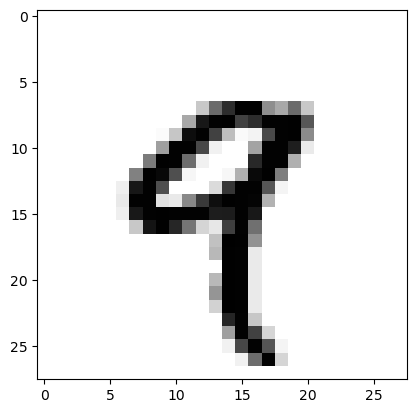

9


In [51]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

print(train_labels[4])

### 2.2.6 넘파이로 텐서 조작하기

- <b>슬라이싱(slicing)</b>: 배열의 특정 원소 선택

In [61]:
my_slice = train_images[10:100] # 11-101(101포함x)
print(my_slice.shape)

my_slice = train_images[10:100, :, :] # ':'은 전체 인덱스 선택
print(my_slice.shape)

my_slice = train_images[10:100, 0:28:, 0:28]
print(my_slice.shape)

(90, 28, 28)
(90, 28, 28)
(90, 28, 28)


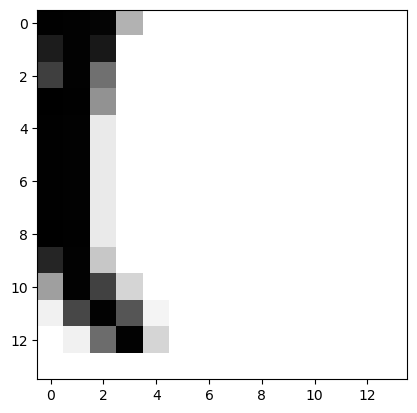

In [66]:
my_slice = train_images[:, 14:, 14:]    # 오른쪽 아래 14 * 14 픽셀 선택

digit = my_slice[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

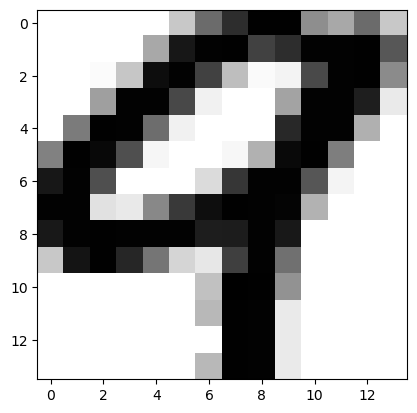

In [67]:
my_slice = train_images[:, 7:-7, 7:-7]  # 음수 인덱스: 축 끝에서 상대적 위치

digit = my_slice[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

### 2.2.7 배치 데이터

- 샘플 축(sample axis, sample dimension): 모든 데이터 텐서의 첫 번째 축(0번쨰 축)

전체 데이터셋을 작은 배치(batch)로 나눔

In [72]:
batch = train_images[:128]  # 크기가 128인 배치 하나

batch = train_images[128:256]  # 그 다음 배치

n = 3
batch = train_images[128 * n:128 * (n + 1) ]  # n번째 배치

- 배치 축(batch axis, batch dimension): 첫 번째 축(0번 축)

### 2.2.7 텐서의 실제 사례

- 벡터 데이터: (samples, features)

&emsp;&emsp;&emsp;&emsp; 사람의 나이, 성별, 소득으로 구성된 인구 통계 데이터.

&emsp;&emsp;&emsp;&emsp; 각 사람은 3개의 값을 가진 벡터로 구성, 10만 명이 포함된 전체 데이터셋은 (100000, 3)

- 시계열 데이터 or 시퀀스(sequence) 데이터: (samples, timesteps, features)

&emsp;&emsp;&emsp;&emsp; 주식 가격 데이터 셋: 1분 마다 현재 주가, 지난 1분 동안 최고가, 최소가 저장.

&emsp;&emsp;&emsp;&emsp; 1분마다 데이터는 3D 벡터로 인코딩, 하루 동안 거래는 (390, 3) 크기 행렬 인코딩 (하루 거래시간 390분)

&emsp;&emsp;&emsp;&emsp; 250일치의 데이터는 (250, 390, 3), 1일치 데이터가 하나의 샘플

- 이미지: (samples, heights, width, channels) [channel-last 방식] or</br>
&emsp;&emsp;&emsp;&emsp;(samples, channels, heights, width) [channel-first 방식]

&emsp;&emsp;&emsp;&emsp; 256x256 크기의 흑백 이미지에 대한 128개의 배치는 (128, 256, 256, 1)

&emsp;&emsp;&emsp;&emsp; 256x256 크기의 컬러 이미지에 대한 128개의 배치는 (128, 256, 256, 3)

- 동영상: (smaples, frames, heights, width, channels) or (smaples, frames, channels, heights, width)

&emsp;&emsp;&emsp;&emsp; 60초 144&256 비디오 클립을 초당 4프레임 샘플링하면 240프레임

&emsp;&emsp;&emsp;&emsp; 이런 비디오 클립을 4개 가진 배치는 (4,240, 144, 256, 3)

## 2.3 신경망의 톱니바퀴: 텐서 연산